# Imported Packages

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import sklearn as skl
import random
from scipy.stats import iqr
import scipy.stats as stats
import seaborn as sns

# Importing the Dataset

In [3]:
data = pd.read_csv('/Users/raph/Desktop/titanic/train.csv').set_index('PassengerId')
print(data.head())
data.dtypes

             Survived  Pclass  \
PassengerId                     
1                   0       3   
2                   1       1   
3                   1       3   
4                   1       1   
5                   0       3   

                                                          Name     Sex   Age  \
PassengerId                                                                    
1                                      Braund, Mr. Owen Harris    male  22.0   
2            Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
3                                       Heikkinen, Miss. Laina  female  26.0   
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
5                                     Allen, Mr. William Henry    male  35.0   

             SibSp  Parch            Ticket     Fare Cabin Embarked  
PassengerId                                                          
1                1      0         A/5 21171   7.2500   NaN        S

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

# Cleaning the Data

In [4]:
data.Age = data.Age.replace(np.nan, 0)

## Creating Filters

In [23]:
# Cutting down the dataset
mod_data = data[['Survived', 'Pclass', 'Age', 'Sex', 'SibSp', 'Parch', 'Fare' ]]


# Classifiers
male_df = mod_data[mod_data.Sex == 'male'].drop(['Sex'], axis = 1)
female_df = mod_data[mod_data.Sex == 'female'].drop(['Sex'], axis = 1)

# Explanatory Variables
in_df_m = male_df.iloc[:,1:7]
in_df_f = female_df.iloc[:,1:7]

#Exploratory Variable
dep_m = male_df.Survived
dep_f = female_df.Survived



In [24]:
male_df

,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,,,,,,
1,0,3,22.0,1,0,7.2500
5,0,3,35.0,0,0,8.0500
6,0,3,0.0,0,0,8.4583
7,0,1,54.0,0,0,51.8625
8,0,3,2.0,3,1,21.0750
...,...,...,...,...,...,...
884,0,2,28.0,0,0,10.5000
885,0,3,25.0,0,0,7.0500
887,0,2,27.0,0,0,13.0000


# Exploratory Data Analysis

## Male Population

### PClass

As seen from the data, majority of the male passengers onboard the Titanic are shown to be in Passenger Class 3 having over 60%. Passenger Class 1 coming in second with just over 20% and Passenger Class 2 having the least with just shy of 20%. 

3    347
1    122
2    108
Name: Pclass, dtype: int64
[347 122 108]


<function matplotlib.pyplot.show(close=None, block=None)>

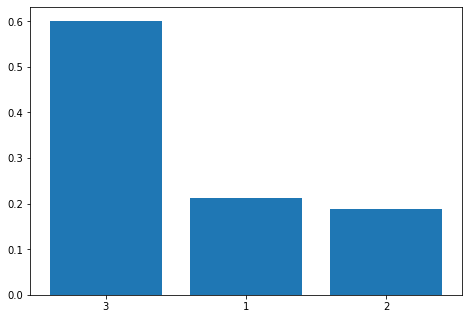

In [10]:
print(male_df.Pclass.value_counts())
print('=============================')
index_pclass = list(map(str,np.array(male_df.Pclass.value_counts().reset_index()).T[0]))
count_pclass =np.array(male_df.Pclass.value_counts().reset_index()).T[1]
norm_pclass = count_pclass/count_pclass.sum()
# Histogram of the PClasses
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(index_pclass, norm_pclass)
plt.show

#### Applying the Freedman-Diacones Rule

In [11]:
def bin_range(df):
    vals = df.values
    bin_width = 2 * (iqr(vals) / (len(vals) ** (1./3)))
    num_bins = int((np.amax(vals) + bin_width) / bin_width)
    return bin_width, num_bins 

def histo_viz(df):
    vals = df.values
    bin_width, num_bins = bin_range(df)
    hist = df.hist(bins=num_bins)
    return hist

### Ages

Bin width: 7.4473
Number of bins: 11
Count of each bin: [150.  13.  81. 117.  87.  44.  38.  23.  16.   6.   2.]
Percentage of each bin: [26, 2, 14, 20, 15, 8, 7, 4, 3, 1, 0]


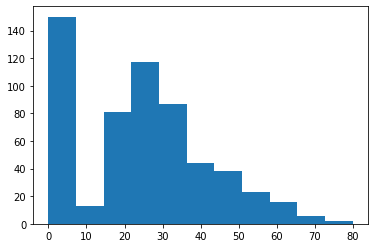

In [12]:
# Bar graph of the ages

width_age, numbin_age = bin_range(male_df.Age)
print('Bin width: {}'.format(round(width_age,4)))
print('Number of bins: {}'.format(numbin_age))
print('====================================')
n_age, binval_age, patches_age = plt.hist(male_df.Age,bins=numbin_age)
norm_n_age = list(map(round, n_age/n_age.sum()*100))
print('Count of each bin: {}'.format(n_age))
print('Percentage of each bin: {}'.format(norm_n_age))

### SibSp

0    434
1    103
2     15
4     12
3      5
5      4
8      4
Name: SibSp, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

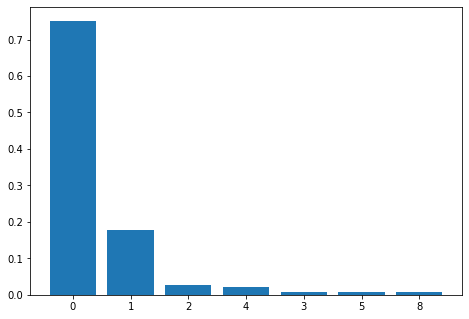

In [15]:
print(male_df.SibSp.value_counts())
print('=============================')
index_sibsp = list(map(str,np.array(male_df.SibSp.value_counts().reset_index()).T[0]))
count_sibsp =np.array(male_df.SibSp.value_counts().reset_index()).T[1]

# Histogram of the SibSp
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(index_sibsp, count_sibsp/count_sibsp.sum())
plt.show

### Parch

0    484
1     58
2     31
4      2
5      1
3      1
Name: Parch, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

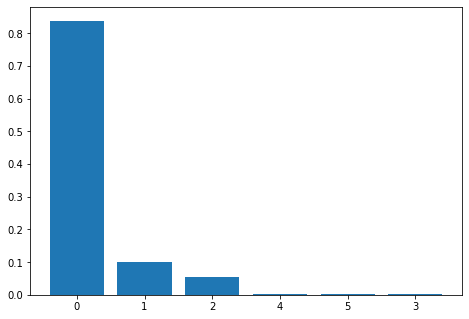

In [16]:
print(male_df.Parch.value_counts())
print('=============================')
index_parch = list(map(str,np.array(male_df.Parch.value_counts().reset_index()).T[0]))
count_parch =np.array(male_df.Parch.value_counts().reset_index()).T[1]

# Histogram of the SibSp
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(index_parch, count_parch/count_parch.sum())
plt.show

## Visualization of the Data

### Parallel Coordinates

Looking at the data may show that Parch and Fare show that they greatly affect the data while both the SibSp and Age may have little effect on the data. However, by normalizing the data, the results vary as follows:

<AxesSubplot:>

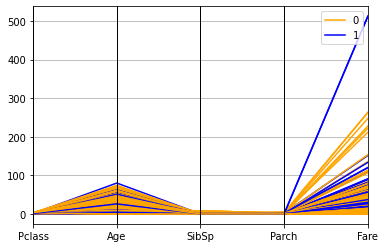

In [25]:
# Initial Data
pd.plotting.parallel_coordinates(male_df, 'Survived', color=('#FFA500', '#0000FF'))

In [108]:
# norm_m_df = (male_df.iloc[:,2:6] -male_df.iloc[:,2:6].mean())/male_df.iloc[:,2:6].std()
# norm_m_df = pd.merge(norm_m_df, dep_m, right_index= True, left_index= True)
# norm_m_df.head()

norm_m_df = male_df.iloc[:,2:6]/male_df.iloc[:,2:6].max()
norm_m_df = pd.merge(norm_m_df, dep_m, right_index= True, left_index= True)
norm_m_df.head()

,Age,SibSp,Parch,Fare,Survived
PassengerId,,,,,
1,0.2750,0.125,0.0,0.014151,0
5,0.4375,0.000,0.0,0.015713,0
6,0.0000,0.000,0.0,0.016510,0
7,0.6750,0.000,0.0,0.101229,0
8,0.0250,0.375,0.2,0.041136,0


Normalizing the data now shows that most points can be distinguished from one another throughout the 4 variables used. Now we move on to checking the correlation of the data using a heatmap. Thus, we can conclude that all 4 varaibles can be applicable in distinguihing the data.

<AxesSubplot:>

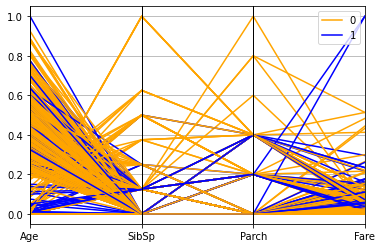

In [109]:
pd.plotting.parallel_coordinates(norm_m_df, 'Survived', color=('#FFA500', '#0000FF'))

### Heat Map (Correlation Coefficient)


In [110]:
temp = norm_m_df.drop(['Survived'], axis=1)
corr = temp.corr()
print(corr)
adj_norm_m_df = corr[((corr > 0.3) & (corr != 1)) | ((corr < -0.3) & (corr != 1))]
print('================================')
print(adj_norm_m_df.count())
print('================================')
print('Total number of correlations that fit into the desire correlation conditions: {}'. format(sum(adj_norm_m_df.count())))

            Age     SibSp     Parch      Fare
Age    1.000000 -0.173230 -0.079041  0.106134
SibSp -0.173230  1.000000  0.524849  0.181804
Parch -0.079041  0.524849  1.000000  0.312197
Fare   0.106134  0.181804  0.312197  1.000000
Age      0
SibSp    1
Parch    2
Fare     1
dtype: int64
Total number of correlations that fit into the desire correlation conditions: 4


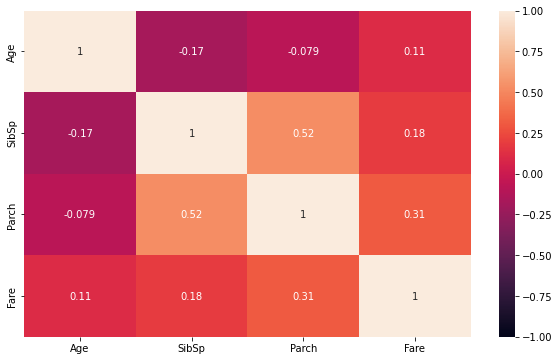

In [111]:
plt.figure(figsize=(10, 6))

heatmap = sns.heatmap(corr, vmin=-1, vmax=1, annot=True)

# Logistic Regression

In [67]:
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from statsmodels.stats.anova import anova_lm # One-way ANOVA

In [112]:
norm_m_df

,Age,SibSp,Parch,Fare,Survived
PassengerId,,,,,
1,0.2750,0.125,0.0,0.014151,0
5,0.4375,0.000,0.0,0.015713,0
6,0.0000,0.000,0.0,0.016510,0
7,0.6750,0.000,0.0,0.101229,0
8,0.0250,0.375,0.2,0.041136,0
...,...,...,...,...,...
884,0.3500,0.000,0.0,0.020495,0
885,0.3125,0.000,0.0,0.013761,0
887,0.3375,0.000,0.0,0.025374,0


In [113]:
logit_model=sm.Logit(dep_m,norm_m_df.iloc[:,0:4])
result=logit_model.fit()
print(result.summary2())


Optimization terminated successfully.
         Current function value: 0.530050
         Iterations 6
                        Results: Logit
Model:              Logit            Pseudo R-squared: -0.094  
Dependent Variable: Survived         AIC:              619.6782
Date:               2022-06-01 18:24 BIC:              637.1096
No. Observations:   577              Log-Likelihood:   -305.84 
Df Model:           3                LL-Null:          -279.63 
Df Residuals:       573              LLR p-value:      1.0000  
Converged:          1.0000           Scale:            1.0000  
No. Iterations:     6.0000                                     
-----------------------------------------------------------------
         Coef.    Std.Err.      z      P>|z|     [0.025    0.975]
-----------------------------------------------------------------
Age     -3.5075     0.3524   -9.9520   0.0000   -4.1983   -2.8167
SibSp   -4.0503     1.1152   -3.6318   0.0003   -6.2361   -1.8645
Parch    1.3693  

Since the $p$-values for the Age and the Parch are greater than 0.05, we remove them to create a more parsiomonios model

In [117]:
logit_model=sm.Logit(dep_m,norm_m_df.iloc[:,[0,1,3]])
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.531769
         Iterations 6
                        Results: Logit
Model:              Logit            Pseudo R-squared: -0.097  
Dependent Variable: Survived         AIC:              619.6619
Date:               2022-06-01 18:25 BIC:              632.7354
No. Observations:   577              Log-Likelihood:   -306.83 
Df Model:           2                LL-Null:          -279.63 
Df Residuals:       574              LLR p-value:      1.0000  
Converged:          1.0000           Scale:            1.0000  
No. Iterations:     6.0000                                     
-----------------------------------------------------------------
         Coef.    Std.Err.      z      P>|z|     [0.025    0.975]
-----------------------------------------------------------------
Age     -3.4864     0.3516   -9.9149   0.0000   -4.1756   -2.7972
SibSp   -3.3130     0.9596   -3.4526   0.0006   -5.1937   -1.4323
Fare     2.5051  

In [119]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [129]:
norm_m_df

,Age,SibSp,Parch,Fare,Survived
PassengerId,,,,,
1,0.2750,0.125,0.0,0.014151,0
5,0.4375,0.000,0.0,0.015713,0
6,0.0000,0.000,0.0,0.016510,0
7,0.6750,0.000,0.0,0.101229,0
8,0.0250,0.375,0.2,0.041136,0
...,...,...,...,...,...
884,0.3500,0.000,0.0,0.020495,0
885,0.3125,0.000,0.0,0.013761,0
887,0.3375,0.000,0.0,0.025374,0


In [199]:
X_train = norm_m_df.iloc[:,[0,1,3]]
y_train = dep_m

X_test = pd.read_csv('/Users/raph/Desktop/titanic/test.csv').set_index('PassengerId')
X_test.drop(['Pclass','Name','Sex','Cabin','Embarked','Ticket','Parch'], axis = 1, inplace = True)

X_test.Age = X_test.Age.replace(np.nan, 0)
X_test.Fare = X_test.Fare.replace(np.nan, 0)
X_test.dropna(inplace = True)


y_test = pd.read_csv('/Users/raph/Desktop/titanic/gender_submission.csv').set_index('PassengerId')

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [201]:
X_test = X_test/X_test.max()
X_test

,Age,SibSp,Fare
PassengerId,,,
892,0.453947,0.000,0.015282
893,0.618421,0.125,0.013663
894,0.815789,0.000,0.018909
895,0.355263,0.000,0.016908
896,0.289474,0.125,0.023984
...,...,...,...
1305,0.000000,0.000,0.015713
1306,0.513158,0.000,0.212559
1307,0.506579,0.000,0.014151


In [202]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.64


In [203]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[266   0]
 [151   1]]


In [204]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.64      1.00      0.78       266
           1       1.00      0.01      0.01       152

    accuracy                           0.64       418
   macro avg       0.82      0.50      0.40       418
weighted avg       0.77      0.64      0.50       418

